In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Task1

In [2]:
def model(y,t):
    dRdt = ((1-y[0])/(1+y[1]))-y[0]
    dIdt = (y[0]/(y[0]+1))-y[1]
    return [dRdt, dIdt]

*The above model is defined by setting all the constant variables to '1', as described in part 'd' of the task.*

In [3]:
y = np.array([np.linspace(0,2,20),np.linspace(0,2,20)])
Y1, Y2 = np.meshgrid(y[0], y[1])

In [4]:
u = np.zeros_like(Y1)
v = np.zeros_like(Y2)
for i in range(len(Y1)):
    for j in range(len(Y2)):
        z = model(np.array([Y1[i,j],Y2[i,j]]),_)
        u[i,j] = z[0]
        v[i,j] = z[1]

In [5]:
t = np.linspace(0,10,100)
R = 1/(2+y[1])
I = y[0]/(1+y[0])
U1 = odeint(model,[0,0],t)
U2 = odeint(model,[2,0],t)
U3 = odeint(model,[0,2],t)
U4 = odeint(model,[1,1],t)

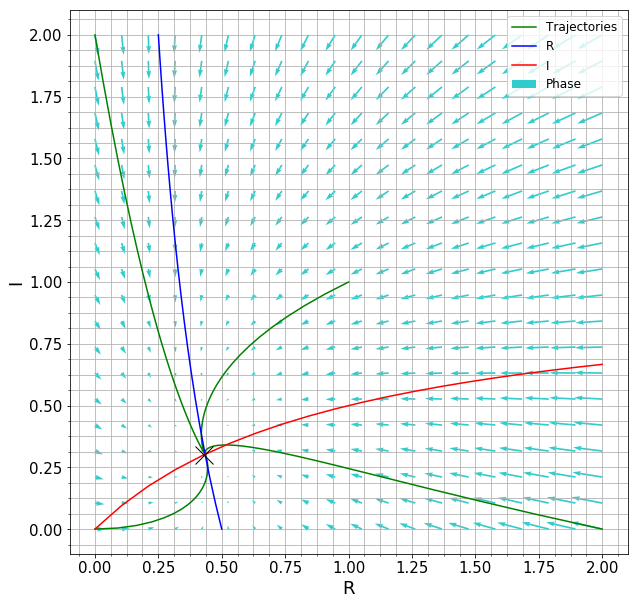

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
ax.quiver(Y1, Y2, u, v, alpha = 0.8, color='c',label='Phase')
ax.plot(U1[:,0], U1[:,1], 'g-',label='Trajectories')
ax.plot(U2[:,0], U2[:,1], 'g-')
ax.plot(U3[:,0], U3[:,1], 'g-')
ax.plot(U4[:,0], U4[:,1], 'g-')
ax.plot(R, y[1], 'b-', label='R')
ax.plot(y[0], I, 'r-', label='I')
ax.plot(0.43,0.30,'kx', markersize=18)
ax.grid(which='both')
ax.minorticks_on()
ax.legend(loc='best',fontsize=12)
ax.set_xlabel('R', fontsize=18)
ax.set_ylabel('I', fontsize=18)
ax.tick_params(labelsize=15)

# Task 2

In [7]:
def gillespie_SIR(x0,tf):
    lamda = 10**(-4)
    delta = 10**(-8)
    beta = 5*(10**(-5))
    kr = 0.3
    
    x1 = x0[0]
    x2 = x0[1]
    x3 = x0[2]
    x4 = x0[3]
    
    Nr = np.array(([1,-1,-1,0,0,0],[0,0,1,-1,-1,0],[0,0,0,0,1,-1],[0,0,0,1,0,0]))
    X = []
    tvec = []
    x = x0
    X.append(x)
    t = 0
    tvec.append(t)
    
    while t<tf:
        alpha = np.array([lamda,delta*x1,beta*(x1*x2),(3*(10**7)*delta*x2),kr*x2,delta*x3])        
        W = sum(alpha)
        tau = (-1/W)* math.log(np.random.uniform(0,1)) # when does the next reaction take place
        r = np.where(np.cumsum(alpha) >= W*np.random.uniform(0,1))[0].min() #  which reaction does take place
        x = x + Nr[:,r] # update state vector
        t = t + tau # update time
        x1 = x[0]
        x2 = x[1]
        x3 = x[2]
        x4 = x[3]
        if (t<tf):
            tvec.append(t)
            X.append(x)
    
    return (X,tvec)

*In the function above the Gillespie Stochastic Simulation Algorithm is implemented for susceptible-infected recovered (SIR) model*

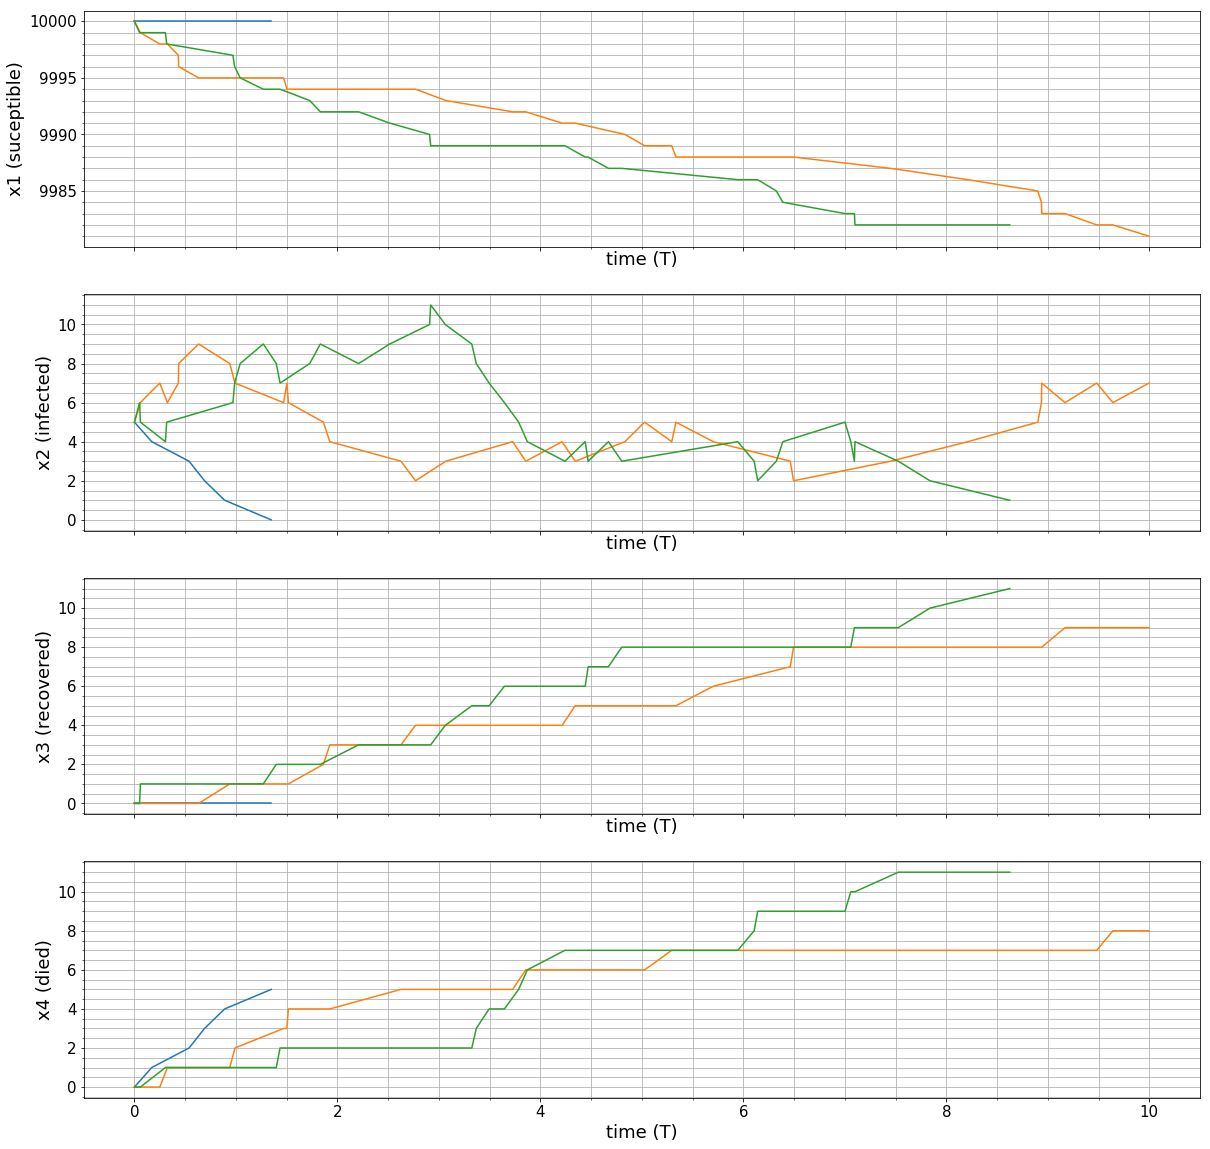

In [8]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,20),sharex=True)

for traj in range(3):
    X,tvec = gillespie_SIR([10**4,5,0,0],10,)
    X = np.array(X)
    ax1.plot(tvec,X[:,0])
    ax1.grid(which='both')
    ax1.minorticks_on()
    ax1.set_xlabel('time (T)', fontsize=18)
    ax1.set_ylabel('x1 (suceptible)', fontsize=18)
    ax1.tick_params(labelsize=15)
    
    ax2.plot(tvec,X[:,1])
    ax2.grid(which='both')
    ax2.minorticks_on()
    ax2.set_xlabel('time (T)', fontsize=18)
    ax2.set_ylabel('x2 (infected)', fontsize=18)
    ax2.tick_params(labelsize=15)
    
    ax3.plot(tvec,X[:,2])
    ax3.grid(which='both')
    ax3.minorticks_on()
    ax3.set_xlabel('time (T)', fontsize=18)
    ax3.set_ylabel('x3 (recovered)', fontsize=18)
    ax3.tick_params(labelsize=15)
    
    ax4.grid(which='both')
    ax4.minorticks_on()
    ax4.set_xlabel('time (T)', fontsize=18)
    ax4.set_ylabel('x4 (died)', fontsize=18)
    ax4.tick_params(labelsize=15)
    ax4.plot(tvec,X[:,3])

In [9]:
x2 = []
x4 = []
for i in range(1000):
    X,tvec = gillespie_SIR([10**4,5,0,0],10)
    X = np.array(X)
    x2.append(X[-1,1])
    x4.append(X[-1,3])

In [10]:
P2 = []
P4 = []
for i in range(21):
    P2.append(len((np.where(np.array(x2)==i)[0]))/1000)
for j in range(36):
    P4.append(len((np.where(np.array(x4)==j)[0]))/1000)
P2 = np.array(P2)
P4 = np.array(P4)

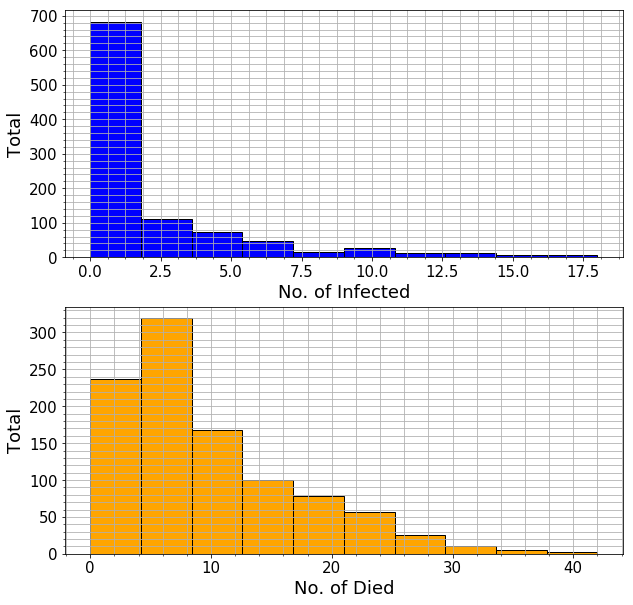

In [11]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.hist(x2,color='blue',edgecolor='black')
ax1.grid(which='both')
ax1.minorticks_on()
ax1.set_xlabel('No. of Infected', fontsize=18)
ax1.set_ylabel('Total', fontsize=18)
ax1.tick_params(labelsize=15)

ax2.hist(x4,color='orange',edgecolor='black')
ax2.grid(which='both')
ax2.minorticks_on()
ax2.set_xlabel('No. of Died', fontsize=18)
ax2.set_ylabel('Total', fontsize=18)
ax2.tick_params(labelsize=15)

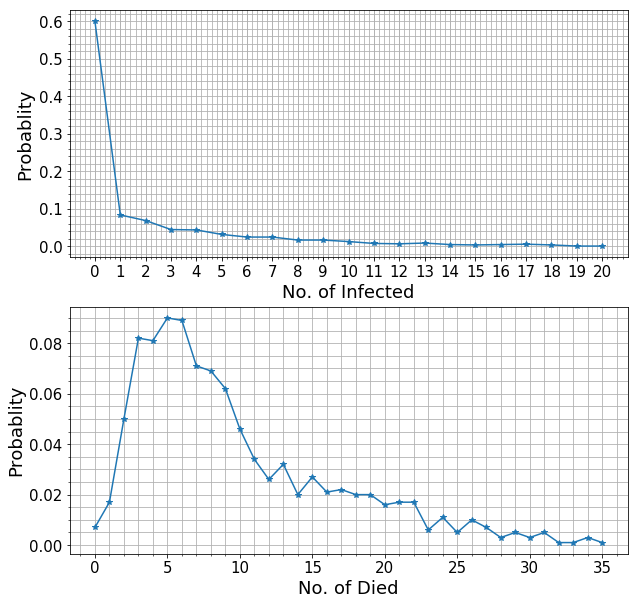

In [12]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.plot(P2,'-*')
ax1.grid(which='both')
ax1.minorticks_on()
ax1.set_xlabel('No. of Infected', fontsize=18)
ax1.set_ylabel('Probablity', fontsize=18)
ax1.tick_params(labelsize=15)
ax1.xaxis.set_ticks((np.arange(0, 21, 1)))

ax2.plot(P4,'-*')
ax2.grid(which='both')
ax2.minorticks_on()
ax2.set_xlabel('No. of Died', fontsize=18)
ax2.set_ylabel('Probablity', fontsize=18)
ax2.tick_params(labelsize=15)

In [13]:
print('Probability that the infection is still ongoing at T = 10 is %.2f'%np.array(P2[-1]))

Probability that the infection is still ongoing at T = 10 is 0.00


In [14]:
print('Average Individuals Died = %d, with Standard Deviated = %.2f'%(np.array(x4).mean(),np.array(x4).std()))
#print(np.array(x3).std())

Average Individuals Died = 9, with Standard Deviated = 7.09
